In [1]:
#Import Mods
import pandas as pd
import numpy as np

import glob

import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta

from PIL import Image, ImageDraw

In [2]:
#Grab files from directory and sort them into correct order
files = []
for filename in glob.glob("/lcrc/project/waggle/public_html/private/training_data/waggle_area510/mobotix/thermal/"
                          "*.thermal.celsius.csv"):
    files.append(filename)
files.sort()

In [ ]:
#Run through all images and save off average temperature for each
image_time = []

for path in files:
    file = pd.read_csv(path)
    image_time.append(datetime.fromtimestamp(int(path[86:96])) + timedelta(hours = 5))
    image_array = []
    mask_image = []
    
    
    for i in range(file.size):
        if i >= 6:
            data = file.values[i][0]
            data = data.split(';')
            array = np.array(data)
            array = array.astype(np.float)
            image_array.append(array)
            
    image_array = np.array(image_array)
    

In [3]:
sky_temp = []
image_time = []

timeset = datetime(2021, 4, 15, 5, 0)

for path in files:
    file = pd.read_csv(path)
    image_time.append(timeset)
    time_change = timedelta(minutes=7)
    timeset = timeset + time_change
    
    data = file.values[6][0]
    data = data.split(';')
    array = np.array(data)
    array = array.astype(np.float)
    Left_Top_Corner = array[0]
    sky_temp.append(Left_Top_Corner)
    
    

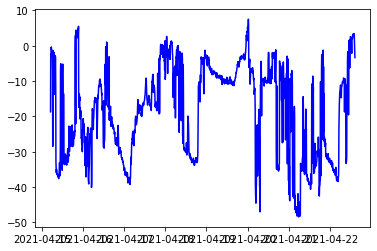

In [5]:
#Plot time series
plt.plot(image_time, sky_temp, color='blue')
#plt.savefig('Thermal_Time_Series_Second.png')

In [6]:
file = pd.read_csv("/lcrc/project/waggle/public_html/private/training_data/waggle_area510/mobotix/"
                "thermal/1618803166_000001_right_336x252_14bit.thermal.celsius.csv")

In [7]:
#Create image list by unpacking data from CSV and placing in correct spot.
image_array = []

for i in range(file.size):
    if i >= 6:
        data = file.values[i][0]
        data = data.split(';')
        array = np.array(data)
        array = array.astype(np.float)
        image_array.append(array)
        

In [9]:
#Create mask list with threshold value.
mask_col = []

for j in image_array:
    mask_row = []
    for k in range(len(j)):
        
        if k > 160 and k < 210:
            
            if j[k] > 19.75:
                mask_row.append(1)
            else:
                mask_row.append(0)
                
        else:
            mask_row.append(0)

    mask_col.append(mask_row)

In [51]:
#Create mask list with threshold value.
mask_col = []

for j in image_array:
    mask_row = []
    for k in range(len(j)):
            if j[k] < 2:
                mask_row.append(1)
            else:
                mask_row.append(0)

    mask_col.append(mask_row)

In [52]:
#create mask array and a find x-y values of for desired area
mask_array = np.array(mask_col)
x, y = np.nonzero(mask_array)

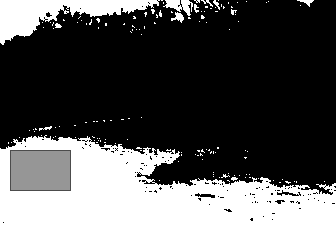

In [53]:
#Create image with with mask array
#This shape is a rectangle given the top left corner and botttom right corner
shape1 = [(10, 150), (70, 190)]

shape2 = [(160, 210), (200, 245)]

#Tranform list into array and convert all true values from 1 to 255 as well as use an unsigned 8-bit integer dtype.
array = np.array(mask_col).astype('uint8')*255

#create image
im = Image.fromarray(array)

img1 = ImageDraw.Draw(im)
img1.rectangle(shape1, fill = 150 , outline ="red")
#im.save('Mulch_Mask.png')
im